In [ ]:
import pandas as pd
data = pd.read_csv('/content/python.csv')
data = pd.DataFrame(data)
print(data)

            Date  Cases Rate - Total  Deaths Rate - Total  \
0     05/11/2024                1.40                 0.01   
1     05/12/2024                1.46                 0.01   
2     05/13/2024                1.47                 0.01   
3     05/14/2024                1.44                 0.00   
4     05/15/2024                1.52                 0.00   
...          ...                 ...                  ...   
1520  12/19/2023               12.34                 0.07   
1521  02/18/2024                5.15                 0.03   
1522  03/22/2024                1.97                 0.01   
1523  02/15/2024                5.38                 0.03   
1524  02/16/2024                5.30                 0.03   

      Hospitalizations Rate - Total  Cases Rate - Age 0-17  \
0                              0.14                   1.17   
1                              0.13                   1.17   
2                              0.16                   1.30   
3                  

Objective 1: Comparison between case rate and hospitalization rate and death rate (totally)


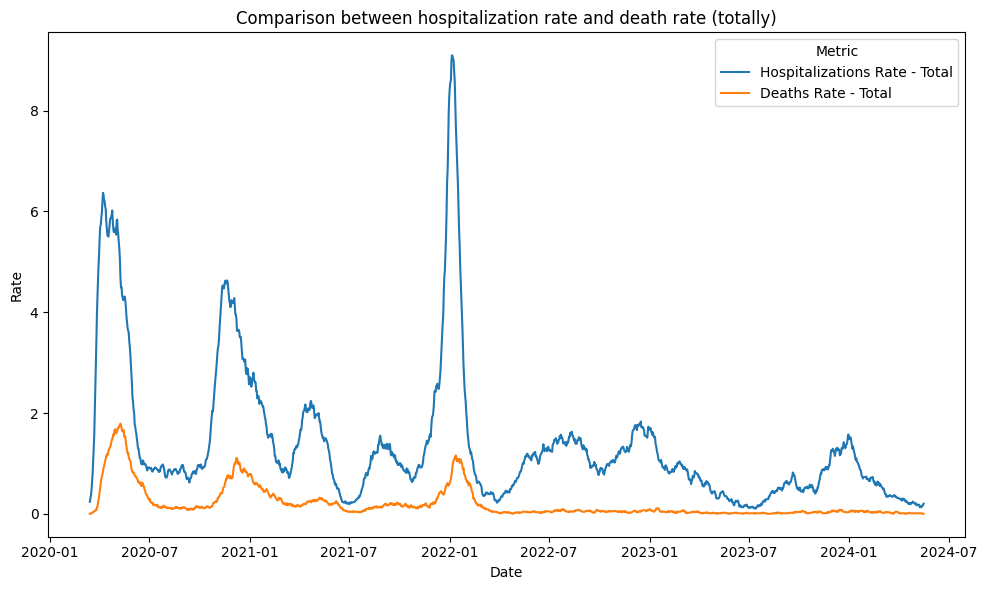

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/python.csv')
data = pd.DataFrame(data)

df = pd.melt(data,id_vars='Date',value_vars=['Hospitalizations Rate - Total','Deaths Rate - Total'], var_name='Metric',value_name='Rate')
df['Date'] = pd.to_datetime(df['Date'])
filtered_data = df.sort_values('Date').head(30)
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x = 'Date',y='Rate',hue='Metric')
plt.title("Comparison between hospitalization rate and death rate (totally)")
plt.ylabel('Rate')
plt.xlabel('Date')
plt.grid(False)
plt.tight_layout()
plt.show()




Objective 2: correlation between age-wise hospitalisation and case rate


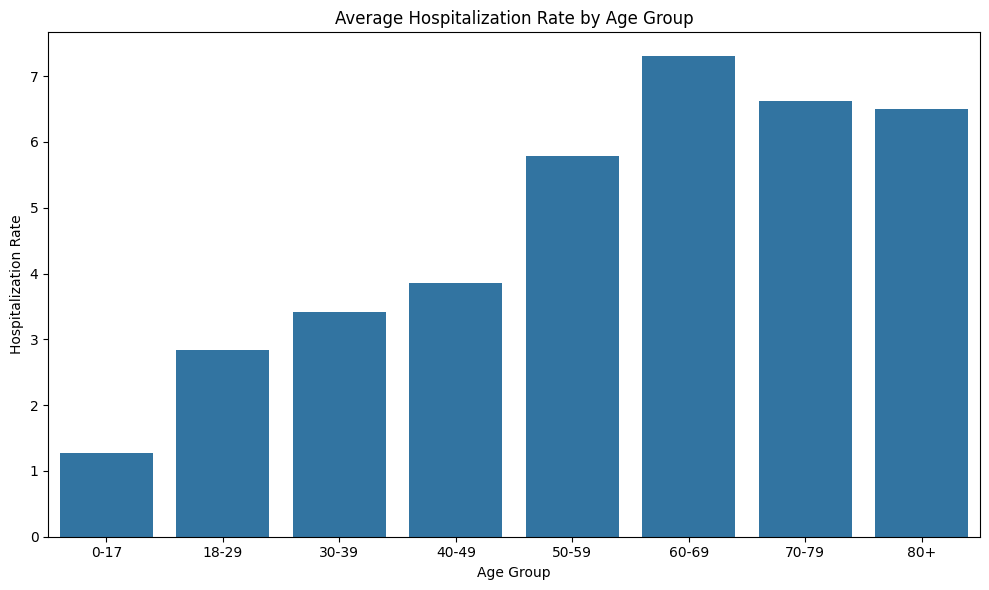

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/python.csv')

hospitalize = [
    'Hospitalizations - Age 0-17',
    'Hospitalizations - Age 18-29',
    'Hospitalizations - Age 30-39',
    'Hospitalizations - Age 40-49',
    'Hospitalizations - Age 50-59',
    'Hospitalizations - Age 60-69',
    'Hospitalizations - Age 70-79',
    'Hospitalizations - Age 80+'
]

# Calculate average across time for each age group
avg = data[hospitalize].mean().reset_index()
avg.columns = ['Metric', 'Rate']  # Rename for generality

# Extract age group from the 'Metric' column
avg['Age Group'] = avg['Metric'].str.extract(r'Age\s*(.*)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg, x='Age Group', y='Rate')

plt.title('Average Hospitalization Rate by Age Group')
plt.ylabel('Hospitalization Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()



Objective 3: Race wise hospitalisation and case rate


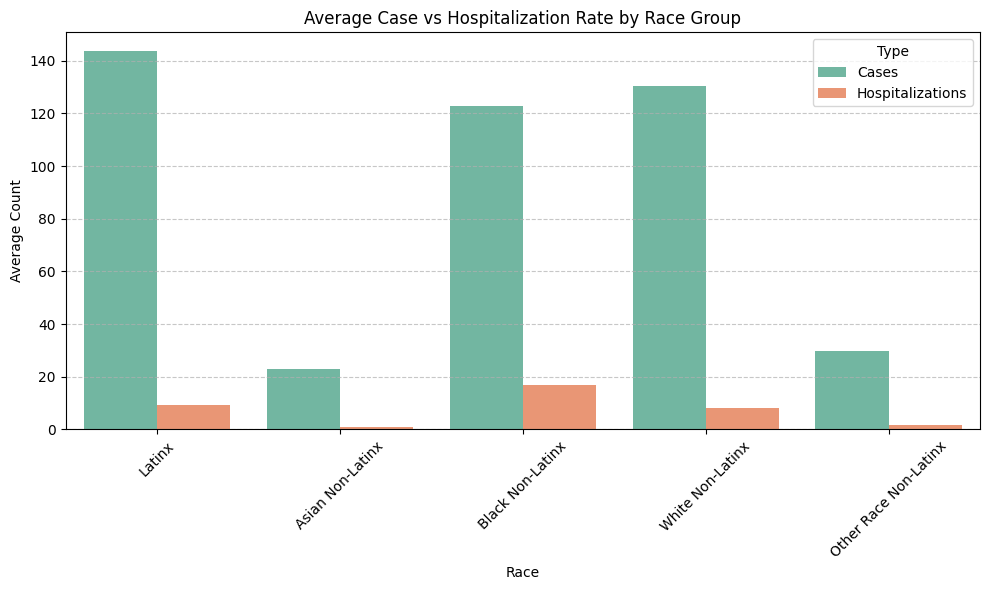

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/python.csv')

race_groups = ['Latinx', 'Asian Non-Latinx', 'Black Non-Latinx', 'White Non-Latinx', 'Other Race Non-Latinx']
cases_cols = [f'Cases - {race}' for race in race_groups]
hosp_cols = [f'Hospitalizations - {race}' for race in race_groups]


avg_cases = df[cases_cols].mean()
avg_hosp = df[hosp_cols].mean()

race_df = pd.DataFrame({
    "Race": race_groups * 2,
    "Average Count": list(avg_cases) + list(avg_hosp),
    "Type": ["Cases"] * len(race_groups) + ["Hospitalizations"] * len(race_groups)
})

race_df = race_df.dropna()


plt.figure(figsize=(10, 6))
sns.barplot(data=race_df, x="Race", y="Average Count", hue="Type", palette="Set2")
plt.title("Average Case vs Hospitalization Rate by Race Group")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Objective 4: Corelation between case rate , hospitalisation and death rate year wise

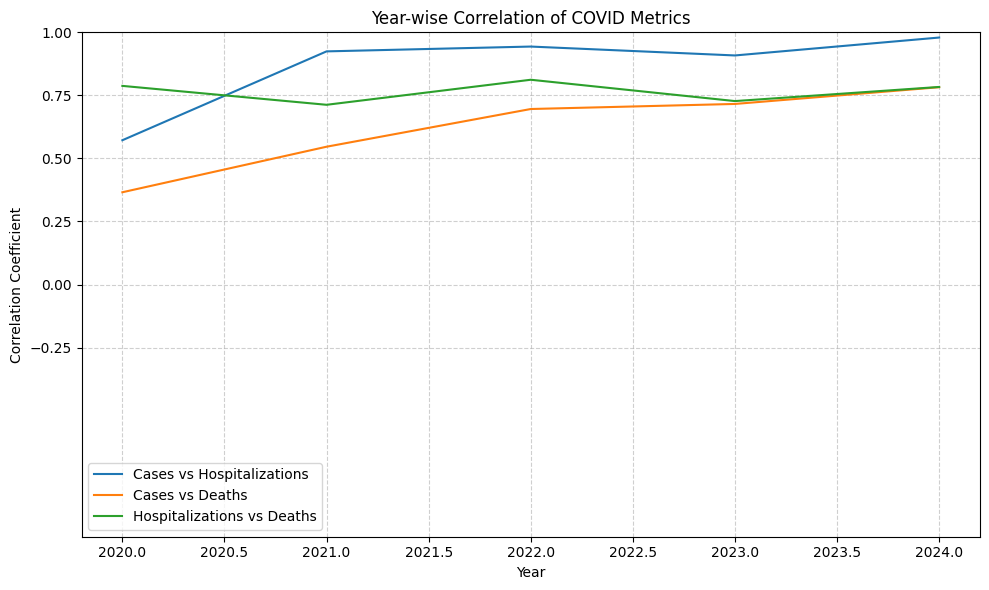

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/python.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Year'] = df['Date'].dt.year

rate_cols = ['Cases Rate - Total', 'Hospitalizations Rate - Total', 'Deaths Rate - Total']
df_yearly = df.groupby('Year')[rate_cols].mean().dropna()


corrs = []
years = df_yearly.index.tolist()

for year in years:
    corr = df[df['Year'] == year][rate_cols].corr()
    corrs.append({
        'Year': year,
        'Cases vs Hospitalizations': corr.loc['Cases Rate - Total', 'Hospitalizations Rate - Total'],
        'Cases vs Deaths': corr.loc['Cases Rate - Total', 'Deaths Rate - Total'],
        'Hospitalizations vs Deaths': corr.loc['Hospitalizations Rate - Total', 'Deaths Rate - Total']
    })

corr_df = pd.DataFrame(corrs)


plt.figure(figsize=(10, 6))
sns.lineplot(data=corr_df, x='Year', y='Cases vs Hospitalizations', label='Cases vs Hospitalizations')
sns.lineplot(data=corr_df, x='Year', y='Cases vs Deaths', label='Cases vs Deaths')
sns.lineplot(data=corr_df, x='Year', y='Hospitalizations vs Deaths', label='Hospitalizations vs Deaths')

plt.title('Year-wise Correlation of COVID Metrics')

plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Objective 5: Linear Regression  of the data(Case rate)


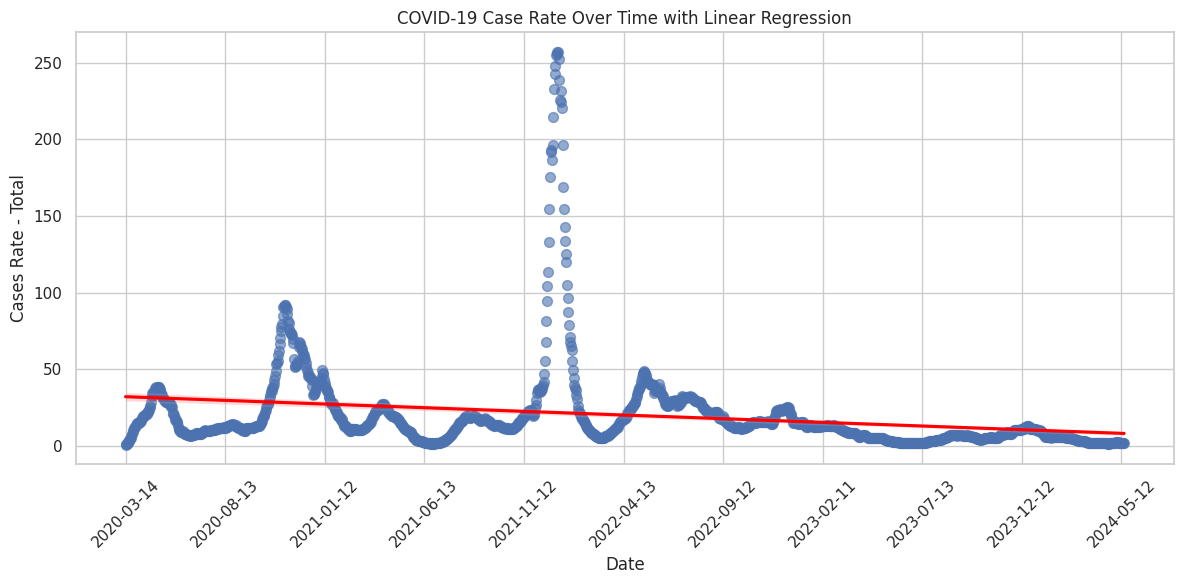

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df = pd.read_csv("/content/python.csv")


df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

# Drop rows with missing case rate
df = df.dropna(subset=['Cases Rate - Total'])

# Sort by date
df = df.sort_values('Date')

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
sns.regplot(
    x=df['Date'].map(datetime.toordinal),  # Convert dates for regplot
    y=df['Cases Rate - Total'],
    scatter_kws={"s": 50, "alpha": 0.6},
    line_kws={"color": "red"},
)

# Beautify the plot
plt.xticks(
    ticks=df['Date'].map(datetime.toordinal)[::int(len(df)/10)],
    labels=df['Date'].dt.strftime('%Y-%m-%d')[::int(len(df)/10)],
    rotation=45
)
plt.title("COVID-19 Case Rate Over Time with Linear Regression")
plt.xlabel("Date")
plt.ylabel("Cases Rate - Total")
plt.tight_layout()
plt.show()

